<a href="https://colab.research.google.com/github/KarenPachon/Tarea-T-picos-/blob/main/Tarea5_Redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TAREA 5**


# Variables cuantitativas de entrada

In [3]:
import pandas as pd #
import matplotlib.pyplot as plt # graficas
import numpy as np # areglos , salidad , datos de validacion
from sklearn.model_selection import train_test_split # redes de clasificacion multicapa otro keras
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier # funcion red neurinal multicapa de clasificacion
from sklearn.metrics import accuracy_score# media de ectaritiud
from sklearn.metrics import classification_report# medida de escalamiento
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving fetal2020.csv to fetal2020 (1).csv


In [ ]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020 (1).csv']), sep = ",", index_col=0, encoding='latin-1') # Separacion por comas y ejecutar el archivo
tabla.head(4)

<ipython-input-7-5f8394a25270>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020 (1).csv']), sep = ",", index_col=0, encoding='latin-1') # Separacion por comas y ejecutar el archivo


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


#Procedimiento 1:




In [ ]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)
#poner degun la clasificacion del Dane para valores deconocidos


<ipython-input-10-bf6af66c2c86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,nan,9,1
11,3,0.0,1,1
11,1,0.0,1,2
11,3,nan,1,1


In [ ]:
df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = "6"
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6,9,1
11,3,0.0,1,1


In [ ]:
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)
df.loc[(df.P_PMAN_IRIS == "6"), 'P_PMAN_IRIS'] = "6"
df.head(2)


<ipython-input-12-9f09b322b575>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6.0,9,1
11,3,0.0,1,1


In [ ]:
df["P_PMAN_IRIS"].value_counts()
df["PESO_NAC"].value_counts()
df["T_GES"].value_counts()

1    23723
9     3127
3     2859
2     2646
4      949
5       23
Name: T_GES, dtype: int64

Primero creamos la variable dummie

## **Variables cualitativas de entrada**
La forma correcta de analizar las variables. Como son variables cualitativas, podemos transformar cada variable cualitativa en un conjunto de variables Dummie.*texto en cursiva*

In [ ]:
x = df.drop("PESO_NAC", axis=1) # de dumie final se quieta LA VARIABLE RESPUESTA .. EN LA TAREA ES PESO
y = df["PESO_NAC"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3) # porcentaje de validacion el restante es de entrenamiento
trainX

,SEXO,P_PMAN_IRIS,T_GES
COD_DPTO,,,
44,2,0.0,4
8,3,6.0,1
8,2,6.0,2
25,3,6.0,1
5,3,6.0,1
...,...,...,...
73,3,6.0,2
54,2,6.0,3
76,2,6.0,1


In [ ]:
df["PESO_NAC"] = df.PESO_NAC.astype(str)
df.loc[(df.PESO_NAC == "1"), 'PESO_NAC'] = "< 1 Kg"
df.loc[(df.PESO_NAC == "2"), 'PESO_NAC'] = "1-1.5 Kg"
df.loc[(df.PESO_NAC == "3"), 'PESO_NAC'] = "1.5-2 Kg"
df.loc[(df.PESO_NAC == "4"), 'PESO_NAC'] = "2-2.3 Kg"
df.loc[(df.PESO_NAC == "5"), 'PESO_NAC'] = "2-2.5 Kg"
df.loc[(df.PESO_NAC == "6"), 'PESO_NAC'] = "3-3.4 Kg"
df.loc[(df.PESO_NAC == "7"), 'PESO_NAC'] = "3-3.5 Kg"
df.loc[(df.PESO_NAC == "8"), 'PESO_NAC'] = ">4 Kg"
df.loc[(df.PESO_NAC == "9"), 'PESO_NAC'] = "deconosico Kg"
print(df)


          SEXO P_PMAN_IRIS  PESO_NAC  T_GES
COD_DPTO                                   
70           3         6.0  1.5-2 Kg      1
11           3         0.0    < 1 Kg      1
11           1         0.0    < 1 Kg      2
11           3         6.0    < 1 Kg      1
11           2         6.0  1.5-2 Kg      3
...        ...         ...       ...    ...
41           3         6.0    < 1 Kg      1
11           3         6.0  1.5-2 Kg      1
11           3         0.0  1.5-2 Kg      1
76           3         6.0    < 1 Kg      1
11           3         0.0    < 1 Kg      1

[33327 rows x 4 columns]


In [ ]:
# from sklearn.impute import SimpleImputer
# simple = SimpleImputer(strategy='most_frequent')
# df = simple.fit_transform(df)
df = pd.DataFrame(df, columns = ["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"])
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6.0,1.5-2 Kg,1
11,3,0.0,< 1 Kg,1
11,1,0.0,< 1 Kg,2
11,3,6.0,< 1 Kg,1


In [ ]:
dummi1 = pd.get_dummies(x['SEXO'], dtype=float)
dummi1.columns = ['Masc', 'Fem', 'Desc']
dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)
dummi2.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido"]
dummi3 = pd.get_dummies(x['T_GES'], dtype=float)
dummi3.columns = ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]
dummi = pd.concat([dummi1, dummi2, dummi3, y], axis=1)
dummi.head(4)

<ipython-input-31-8a7cd2abb3a3>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)


,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.5-2 Kg
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,< 1 Kg
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,< 1 Kg
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,< 1 Kg


# Procedimiento 2:


In [ ]:
x1 = dummi.drop("PESO_NAC", axis=1)
x1
y1 = dummi["PESO_NAC"]
train1, test1, train2, test2 = train_test_split(x1, y1, test_size = 0.3)
train1

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
76,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
41,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
68,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sc=StandardScaler()
# scaler = sc.fit(trainX)
# trainX_scaled = scaler.transform(trainX)
# testX_scaled = scaler.transform(testX)


```
# > sample(3:24, size = 1)
[1] 23
> sample(3:24, size = 1)
[1] 15
```






In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(23,23,23,23,23,23,23,23,23,23,23,23,23,23,23),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(23,23,23,23,23,23,23,23,23,23,23,23,23,23,23),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX, trainY) # capas ocultas ...

MLPClassifier(hidden_layer_sizes=(23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
                                  23, 23, 23, 23),
              max_iter=500)

In [ ]:
y_pred = mlp_clf.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Exactitud: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.76
Exactitud: 0.76


# Procedimiento 3:

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)

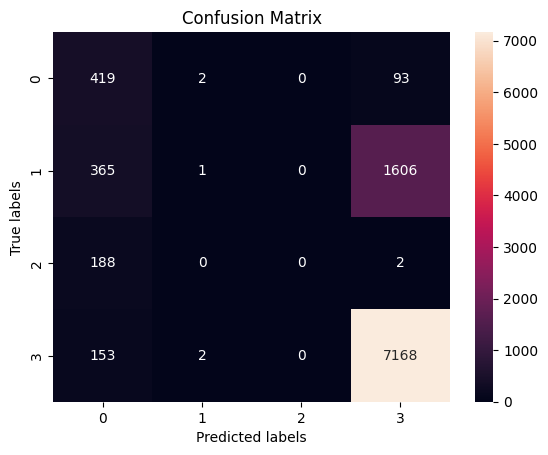

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

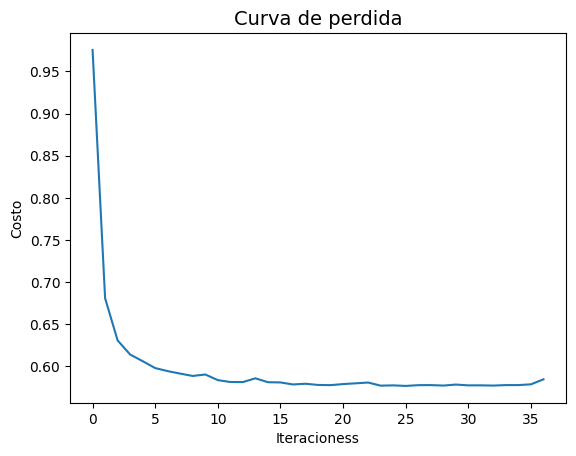

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

La matriz de confucion nos muestra, la exactirud de nuestra predicccion y la curva de perdida podemos notar que nuestro modelo no es adecuado para nuestros datos, pues en la matriz de confusión podemos observar nuestra diagonal en su mayoria de ceros y nuestro ajuste es tan solo de 75% y el modelo se ajusta de buena forma en el intervalo de peso 2.5 - 3 kg

# Procedimiento 4:

Supongamos que un bebé es considerado con bajo peso si al momento de su muerte tiene un peso <2.5 kg

In [ ]:
train1.head(2)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
76,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_obs = np.array([[1, 0, 0]])
mlp_clf.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U8')

In [ ]:
no_obs1 = np.array([[0, 0, 0]])
mlp_clf.predict(no_obs1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U8')

In [ ]:
no_obs2 = np.array([[1, 1, 1]])
mlp_clf.predict(no_obs2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U8')

In [ ]:
df.PESO_NAC.unique() # Mostrar los valores únicos de la variable objetivo 'PESO_NAC' en el conjunto de datos original

array(['1.5-2 Kg', '< 1 Kg', '1-1.5 Kg', '2-2.5 Kg'], dtype=object)

El modelo de clasificación (MLP) predice que, dadas ciertas condiciones de las variables explicativas,un bebé tiene una alta probabilidad de tener un peso al nacer de '< 1 Kg'.Esto sugiere que las condiciones específicas de la causa de muerte, sexo y tiempo de gestación están asociadas con la probabilidad de que un bebé tenga bajo peso al momento de su muerte.

# Procedimeinto 5:

In [ ]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')
mlp_clf2.fit(trainX, trainY) # capas ocultas ...

MLPClassifier(hidden_layer_sizes=(23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
                                  23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
                                  23, 23, 23, 23, 23, 23, 23, 23),
              max_iter=500)

In [ ]:
y_pred2 =  pd.DataFrame(mlp_clf2.predict(testX))
y_pred2.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(testY, y_pred2)))

Exactitud: 0.76


Modelo MLP con capas ocultas más extensas y lo has entrenado con tu conjunto de datos de entrenamiento. Este modelo tiene 30 capas ocultas, cada una con 23 neuronas. La información adicional (como el número de capas ocultas) puede ser útil para evaluar la complejidad del modelo y su rendimiento. Recuerda que aumentar la complejidad del modelo (agregando más capas ocultas o neuronas) también podría aumentar el riesgo de sobreajuste, por lo que es esencial realizar una validación adecuada.